In [72]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

ca11_18 = pd.read_csv("./data/cali_2011_2018.csv", index_col = None)
ca11_18["Date"] = pd.to_datetime(ca11_18["Date"].astype(str), format = "%Y")
ca11_18["Date"] = [x.year for x in ca11_18["Date"]]

list(ca11_18.columns)
ca11_18.head(10)
ca11_18.shape

Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


(9272, 255)

Text(0.5, 1.0, 'Proportion of Missing Values')

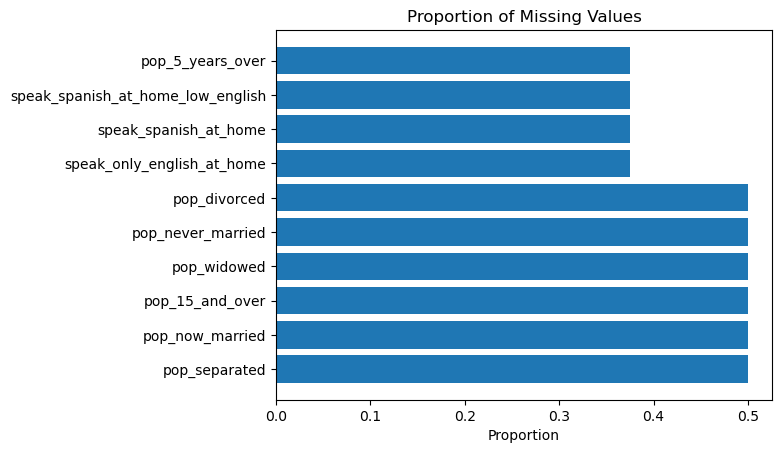

In [40]:
missingCols = ca11_18.isnull().any(axis = 0)
ca11_18.columns[missingCols]
caMiss = ca11_18.isna().mean().sort_values(ascending = False)[:10]
caMiss = caMiss[caMiss > 0].reset_index()
caMiss.columns = ["Var", "Proportion missing"]
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(caMiss["Var"], caMiss["Proportion missing"])
ax.set_xlabel("Proportion")
ax.set_title("Proportion of Missing Values")

In [83]:
ca11_18 = ca11_18.fillna(ca11_18.median())

In [90]:
list(ca11_18.columns)

['Date',
 'RegionName',
 'RegionID',
 'SizeRank',
 'aggregate_travel_time_to_work',
 'amerindian_including_hispanic',
 'amerindian_pop',
 'armed_forces',
 'asian_including_hispanic',
 'asian_male_45_54',
 'asian_male_55_64',
 'asian_pop',
 'associates_degree',
 'avg_rent',
 'bachelors_degree',
 'bachelors_degree_2',
 'bachelors_degree_or_higher_25_64',
 'black_including_hispanic',
 'black_male_45_54',
 'black_male_55_64',
 'black_pop',
 'children',
 'children_in_single_female_hh',
 'civilian_labor_force',
 'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
 'commute_45_59_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_60_more_mins',
 'commute_90_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_

<AxesSubplot:>

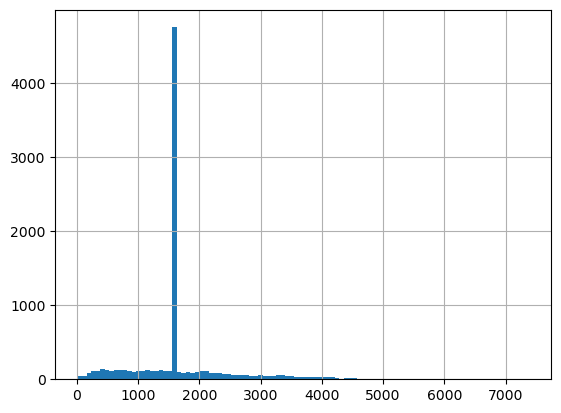

In [84]:
ca11_18["pop_divorced"].hist(bins = 100)

<AxesSubplot:>

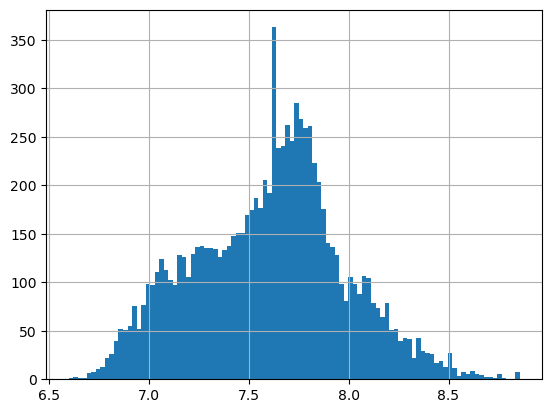

In [92]:
np.log(ca11_18["avg_rent"]).hist(bins = 100)

In [109]:
#fts = ca11_18.drop(["Date","RegionName", "RegionID", "avg_rent","median_rent"], axis = 1)                                        
target = ca11_18["avg_rent"]

In [111]:
fts_std = StandardScaler().fit_transform(fts)
fts_std

array([[-0.53165013,  1.06322421,  0.39449964, ..., -1.31099159,
        -0.57450069,  0.743225  ],
       [-0.39306803,  0.18163118, -0.62575737, ..., -1.32428611,
        -0.59981699,  0.15767894],
       [-0.97569027,  1.23998191,  1.12447433, ..., -1.2777553 ,
         0.20487973,  0.89458916],
       ...,
       [ 2.46056836, -0.15419829, -0.27997989, ..., -1.32317824,
        -1.34483956, -1.51150684],
       [ 0.21727063, -0.68382088, -0.27997989, ...,  0.87551341,
         1.01861797,  0.07737674],
       [ 0.50973661, -0.81616046, -0.27997989, ...,  0.25166817,
         0.43272644, -0.43622735]])

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components = 2)
fts_new = pca.fit_transform(fts)
loadings = pca.components_.T*np.sqrt(pca.explained_variance_)

fig = px.scatter(fts_new, x = 0, y = 1)
for i, ft in enumerate(fts_name):
    fig.add_shape(
        type = 'line',
        x0 = 0, y0 = 0, 
        x1 = loadings[i,0], 
        y1 = loadings[i,1]
    )
    fig.add_annotation(
        x = loadings[i, 0], 
        y = loadings[i, 1],
        ax = 0, ay = 0, 
        xanchor = "center", 
        yanchor = "bottom",
        text = ft,
    )
fig.show()


In [117]:
# check VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features"] = fts_name

#VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(fts.values, i)
                   for i in range(len(fts_name))]


/Users/chereowang27/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



                          features           VIF
0                         SizeRank  3.356341e+01
1    aggregate_travel_time_to_work  6.301628e+01
2    amerindian_including_hispanic  6.273223e+00
3                   amerindian_pop  5.558455e+00
4                     armed_forces           inf
..                             ...           ...
245               white_male_45_54  1.261898e+03
246               white_male_55_64  1.537603e+03
247                      white_pop  1.053007e+04
248                 worked_at_home           inf
249            workers_16_and_over           inf

[250 rows x 2 columns]


In [120]:
print(vif_data.sort_values(by = "VIF"))

                        features       VIF
109  housing_built_2005_or_later  1.916053
193               other_race_pop  3.255943
91      female_female_households  3.644350
108   housing_built_2000_to_2004  3.885185
166         male_male_households  4.077946
..                           ...       ...
119         income_125000_149999       inf
120         income_150000_199999       inf
121           income_15000_19999       inf
123           income_20000_24999       inf
249          workers_16_and_over       inf

[250 rows x 2 columns]
